[*********************100%%**********************]  1 of 1 completed


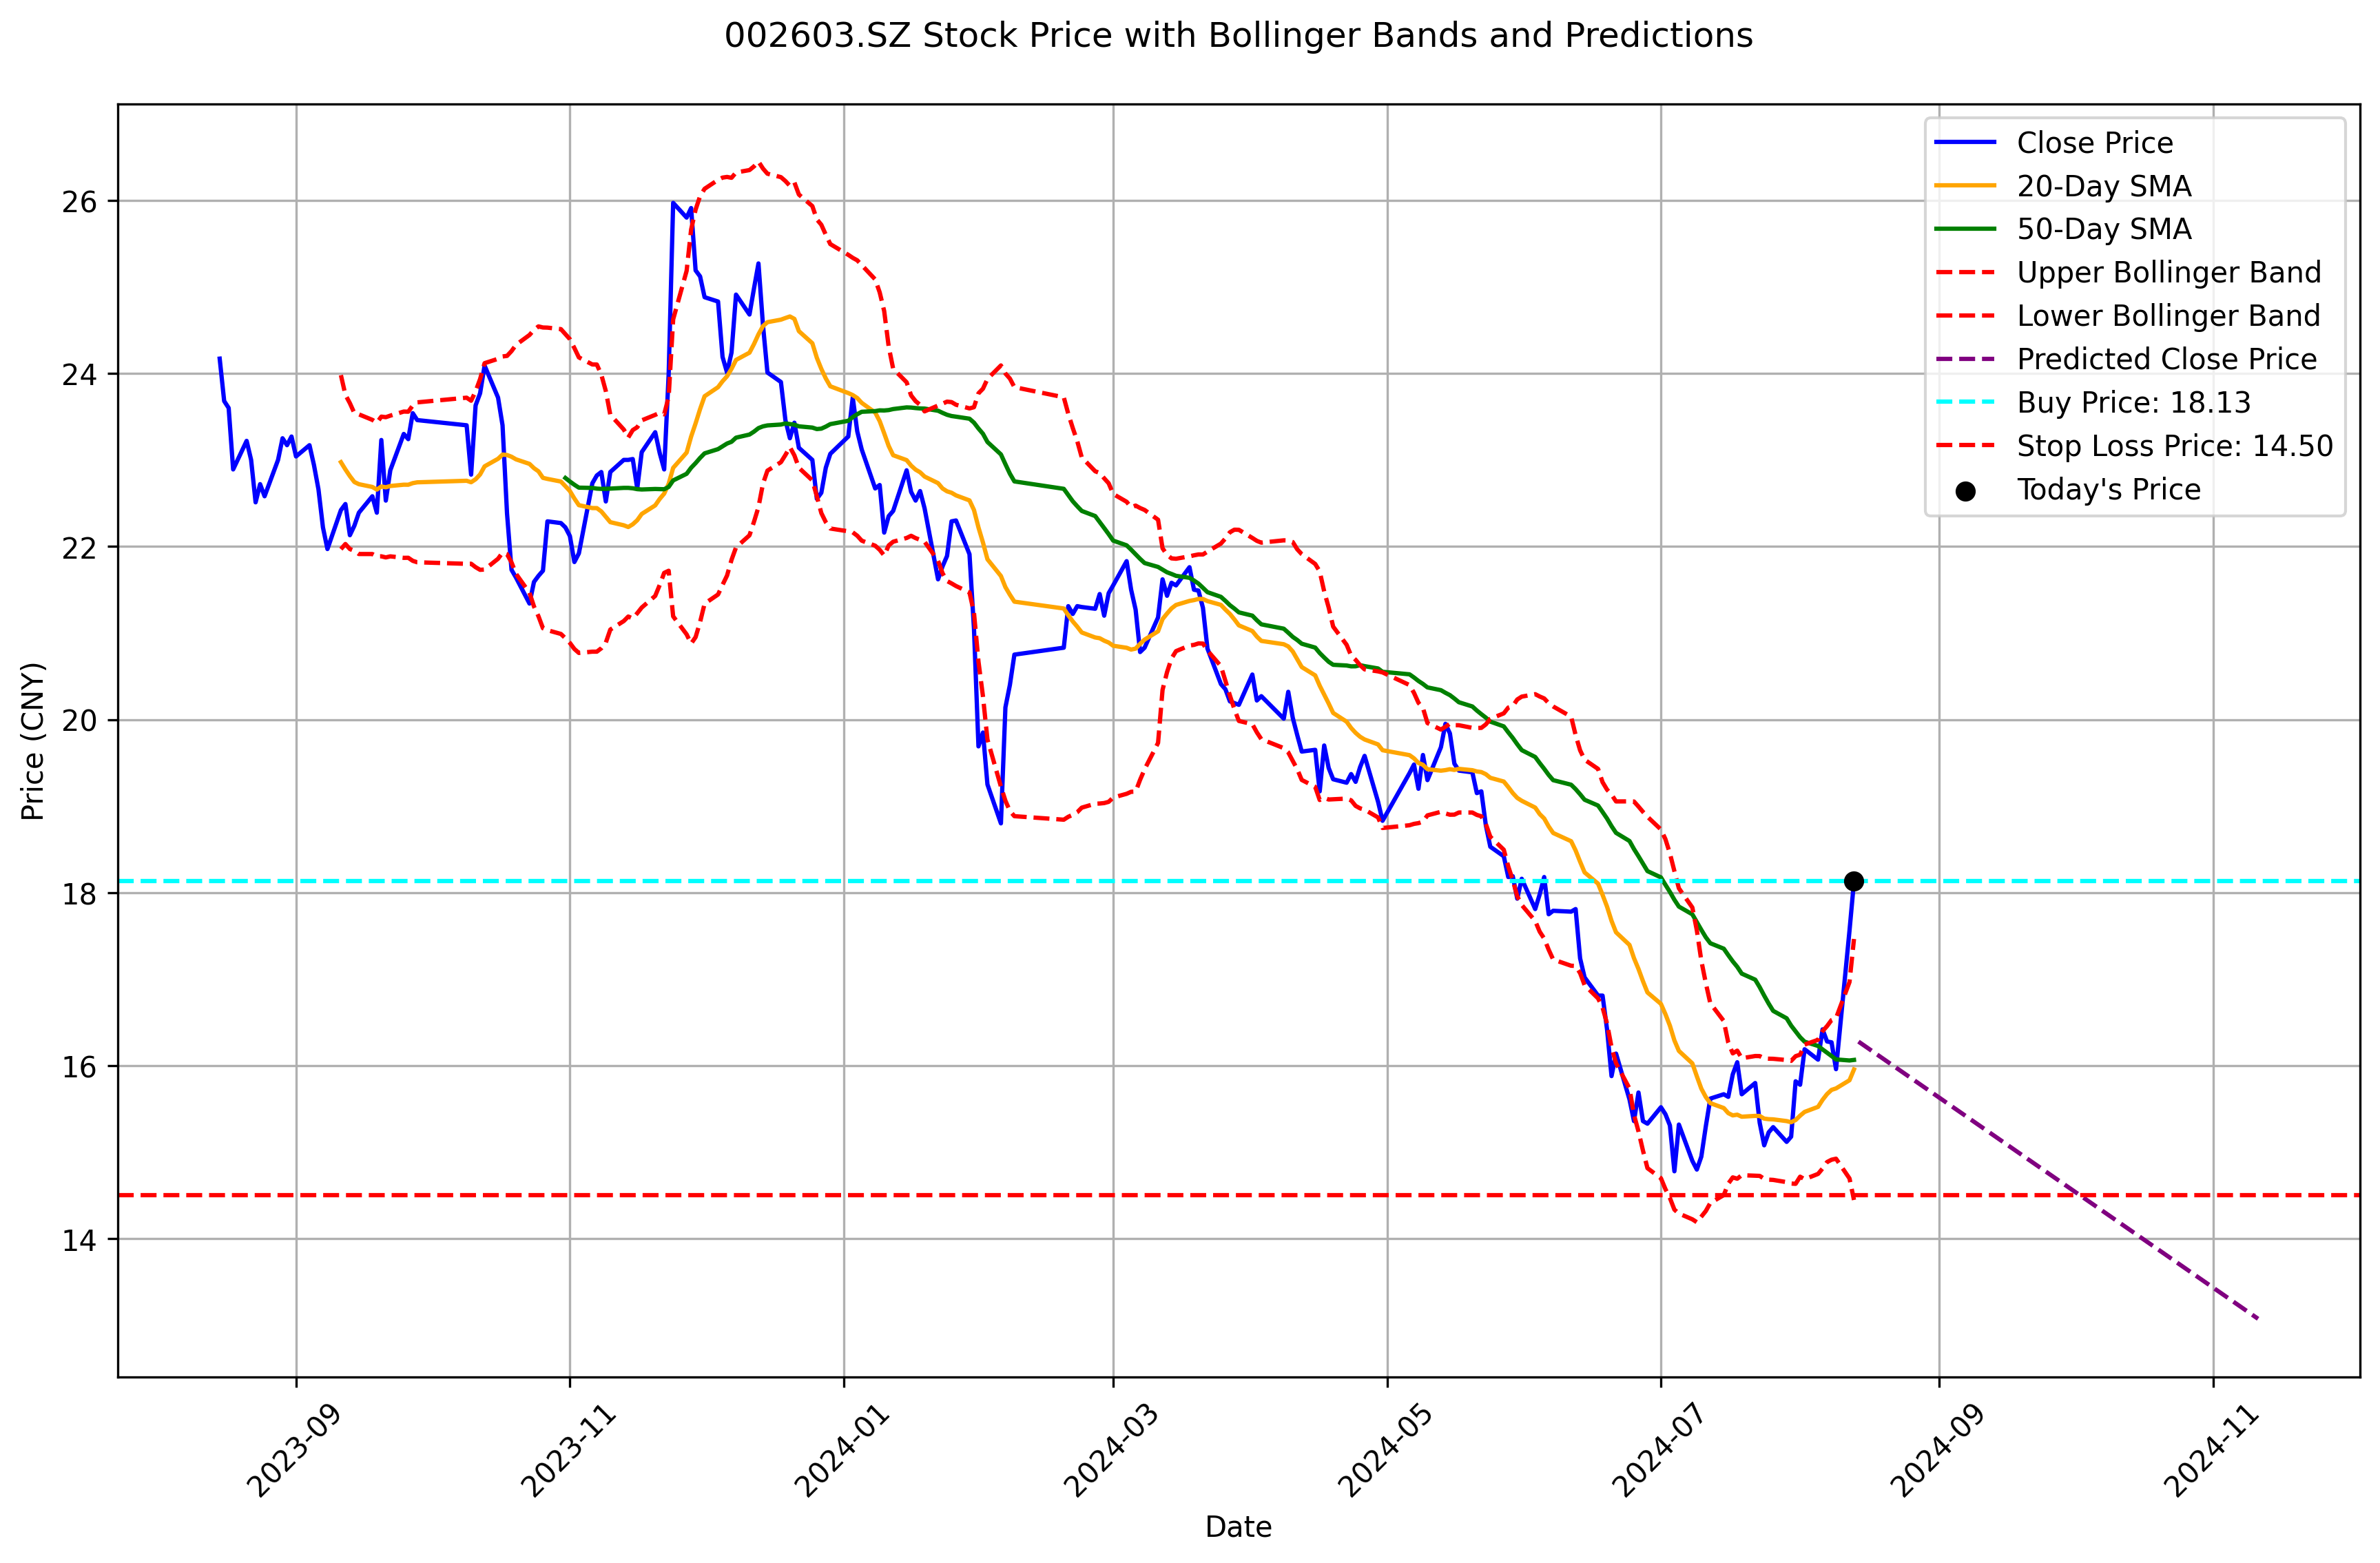

In [3]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Step 1: Obtain the stock historical data (Yiling Pharmaceutical, 002603.SZ)
ticker = '002603.SZ'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=1*365)).strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Calculate short-term (20 days) and long-term (50 days) sliding averages and Bollinger Bands
stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['UpperBand'], stock_data['MiddleBand'], stock_data['LowerBand'] = talib.BBANDS(stock_data['Close'], timeperiod=20)

# Step 3: Predict the trend data for the next 3 months
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Linear Regression for trend prediction
model = LinearRegression()
model.fit(X, y)
future_days = 90  # Predict for 3 months (approx. 90 days)
future_X = np.array(range(len(stock_data) + future_days)).reshape(-1, 1)
predicted_y = model.predict(future_X)

# Step 4: Plotting the data with Bollinger Bands and teacup handle prediction
plt.figure(figsize=(14, 8), dpi=300)

# Plot historical data
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA', color='green')
plt.plot(stock_data.index, stock_data['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(stock_data.index, stock_data['LowerBand'], label='Lower Bollinger Band', color='red', linestyle='--')

# Plot predicted data
future_dates = pd.date_range(stock_data.index[-1], periods=future_days + 1, inclusive='right')
plt.plot(future_dates, predicted_y[-future_days:], label='Predicted Close Price', color='purple', linestyle='--')

# Step 5: Add reference lines
buy_price = stock_data['Close'].iloc[-1]
stop_loss_price = buy_price * 0.8  # Stop loss at 20% below buying price

plt.axhline(y=buy_price, color='cyan', linestyle='--', label=f'Buy Price: {buy_price:.2f}')
plt.axhline(y=stop_loss_price, color='red', linestyle='--', label=f'Stop Loss Price: {stop_loss_price:.2f}')

# Step 6: Mark today's price with a circle
plt.scatter(stock_data.index[-1], stock_data['Close'].iloc[-1], color='black', label="Today's Price", zorder=5)

# Formatting the plot
plt.title(f'{ticker} Stock Price with Bollinger Bands and Predictions', pad=20)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [6]:
ticker = '601127.SS' # 塞力斯

[*********************100%%**********************]  1 of 1 completed


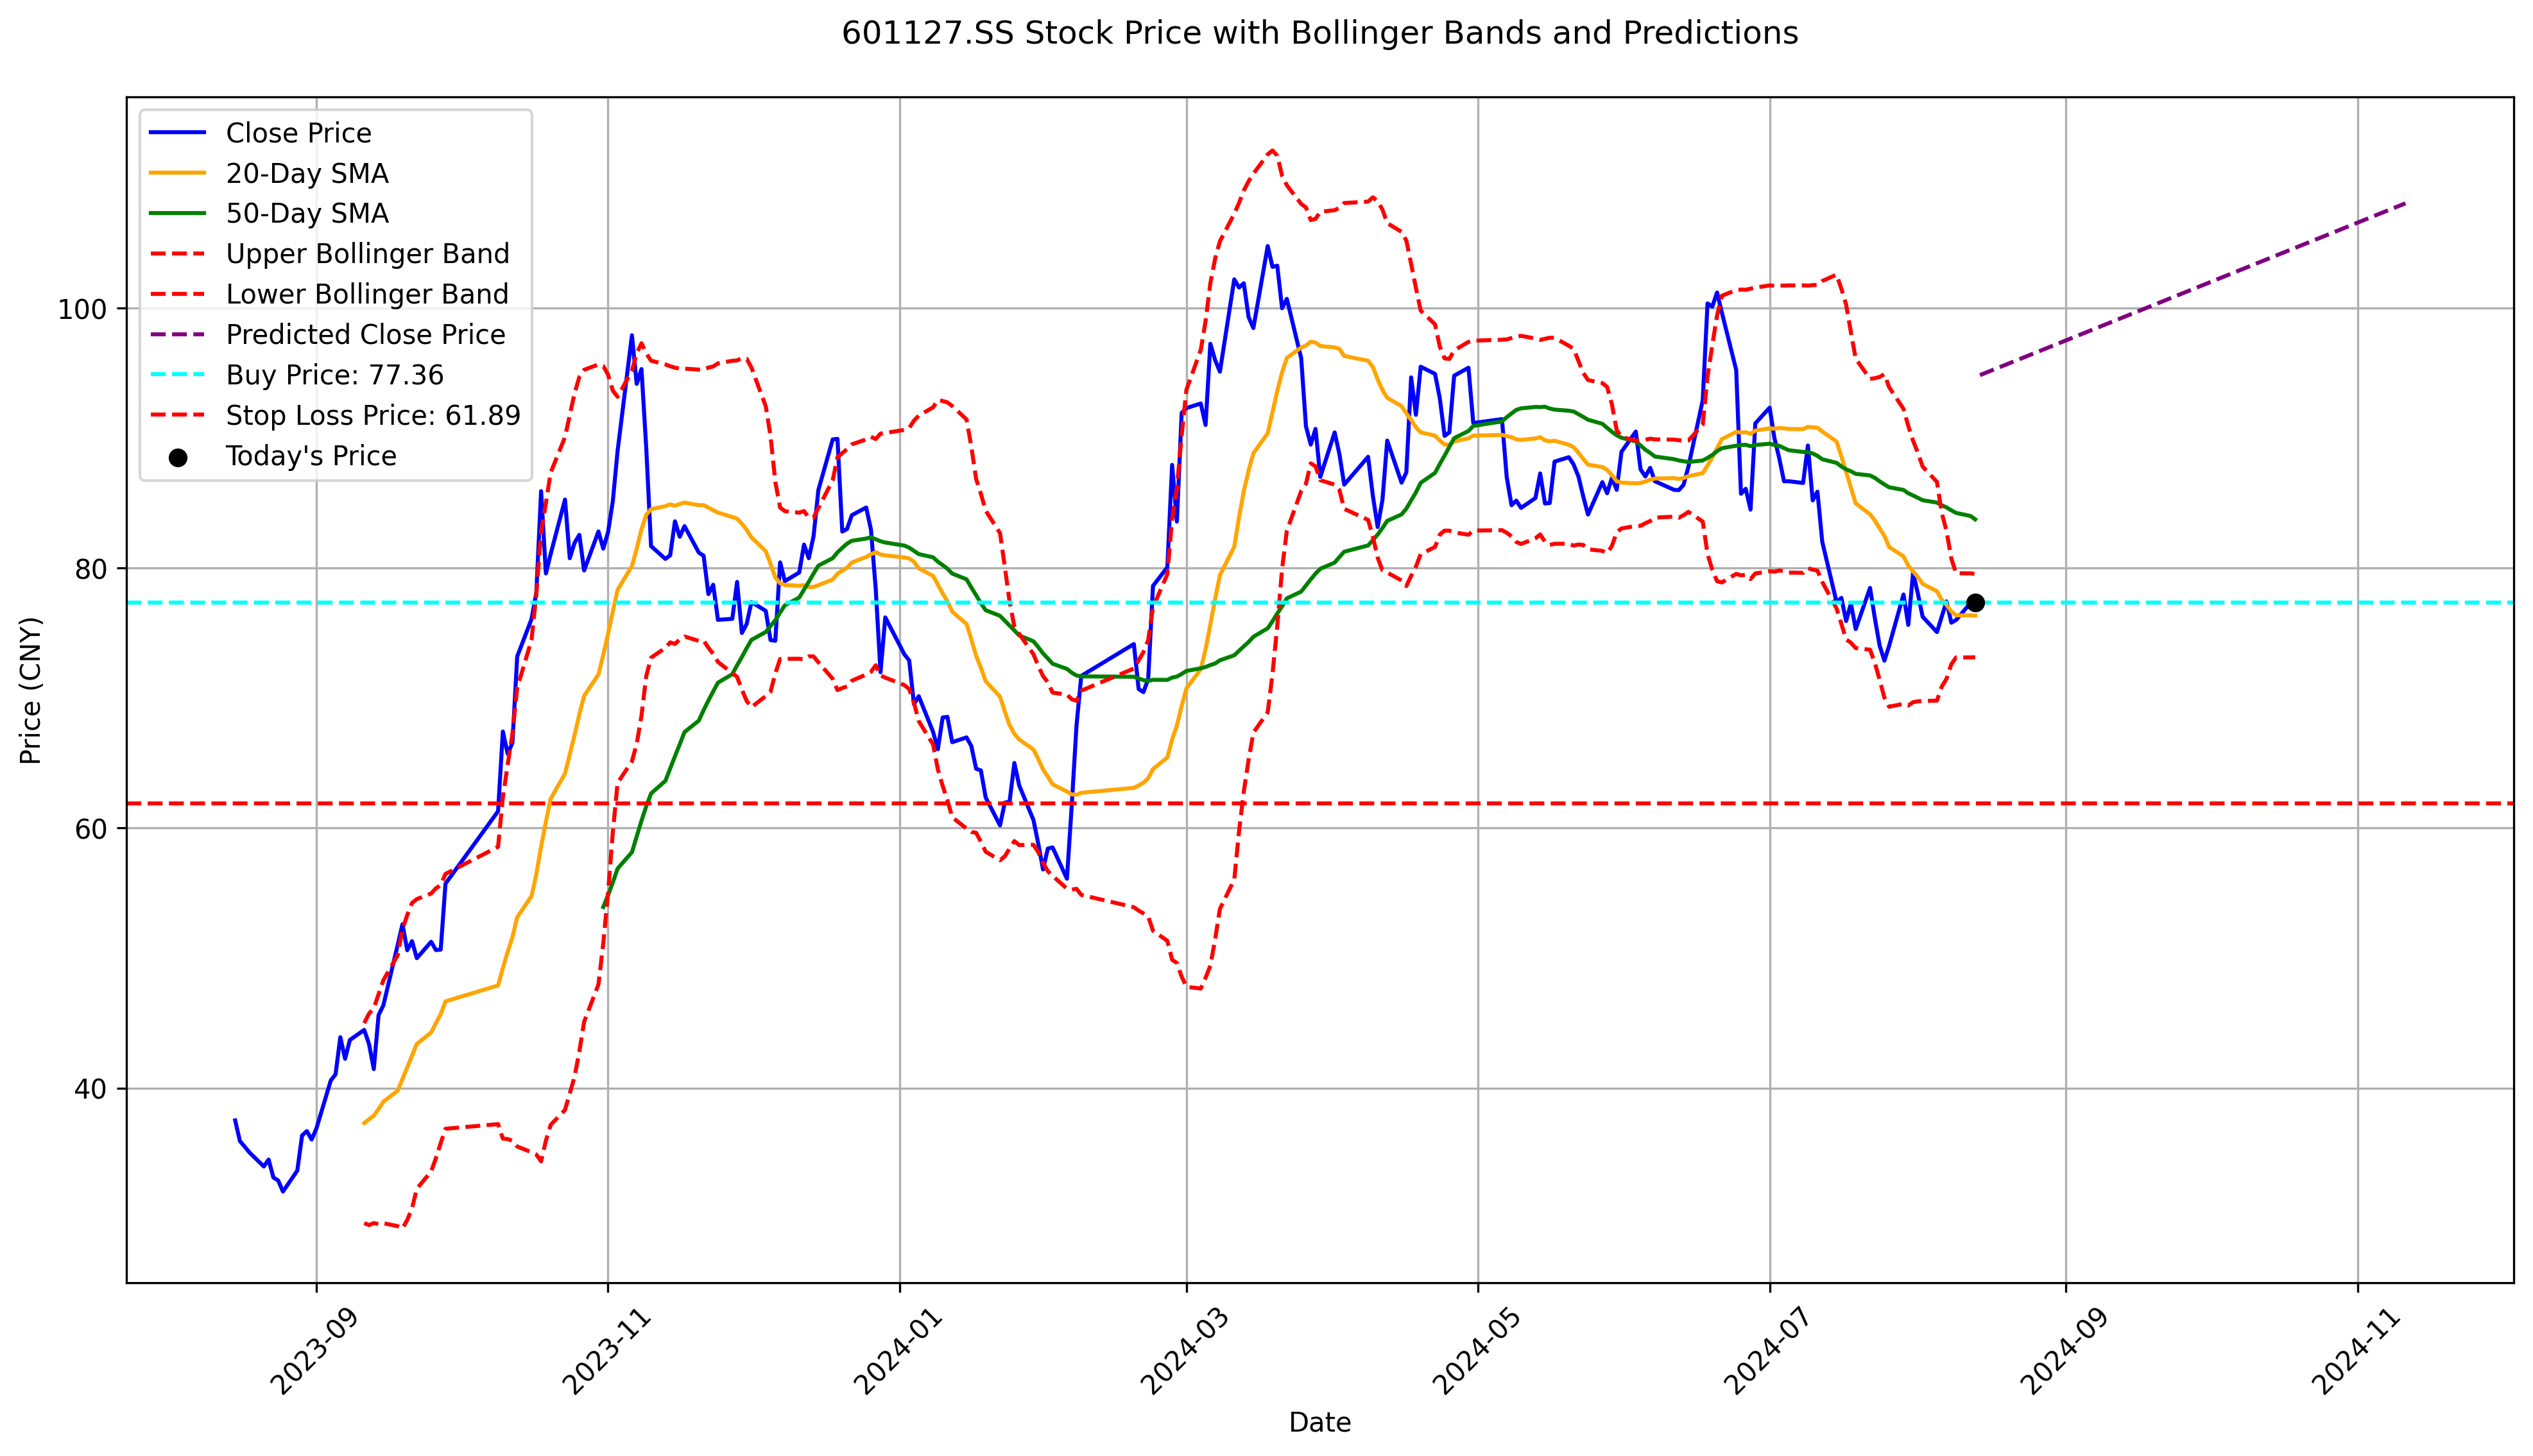

In [8]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta
# Step 1: Obtain the stock historical data (Yiling Pharmaceutical, 002603.SZ)
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=1 * 365)).strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Calculate short-term (20 days) and long-term (50 days) sliding averages and Bollinger Bands
stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['UpperBand'], stock_data['MiddleBand'], stock_data['LowerBand'] = talib.BBANDS(stock_data['Close'],
                                                                                          timeperiod=20)

# Step 3: Predict the trend data for the next 3 months
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Linear Regression for trend prediction
model = LinearRegression()
model.fit(X, y)
future_days = 90  # Predict for 3 months (approx. 90 days)
future_X = np.array(range(len(stock_data) + future_days)).reshape(-1, 1)
predicted_y = model.predict(future_X)

# Step 4: Plotting the data with Bollinger Bands and teacup handle prediction
plt.figure(figsize=(16, 8), dpi=300)

# Plot historical data
plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data.index, stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data.index, stock_data['SMA50'], label='50-Day SMA', color='green')
plt.plot(stock_data.index, stock_data['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(stock_data.index, stock_data['LowerBand'], label='Lower Bollinger Band', color='red', linestyle='--')

# Plot predicted data
future_dates = pd.date_range(stock_data.index[-1], periods=future_days + 1, inclusive='right')
plt.plot(future_dates, predicted_y[-future_days:], label='Predicted Close Price', color='purple', linestyle='--')

# Step 5: Add reference lines
buy_price = stock_data['Close'].iloc[-1]
stop_loss_price = buy_price * 0.8  # Stop loss at 20% below buying price

plt.axhline(y=buy_price, color='cyan', linestyle='--', label=f'Buy Price: {buy_price:.2f}')
plt.axhline(y=stop_loss_price, color='red', linestyle='--', label=f'Stop Loss Price: {stop_loss_price:.2f}')

# Step 6: Mark today's price with a circle
plt.scatter(stock_data.index[-1], stock_data['Close'].iloc[-1], color='black', label="Today's Price", zorder=5)

# Formatting the plot
plt.title(f'{ticker} Stock Price with Bollinger Bands and Predictions', pad=20)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [44]:
stock_data

,Open,High,Low,Close,Adj Close,Volume,SMA20,SMA50,UpperBand,MiddleBand,LowerBand
Date,,,,,,,,,,,
2023-08-15,23.93000031,24.29999924,23.75000000,24.17000008,23.71794319,18400883,NaN,NaN,NaN,NaN,NaN
2023-08-16,24.12000084,24.39999962,23.65999985,23.68000031,23.23710823,18688726,NaN,NaN,NaN,NaN,NaN
2023-08-17,23.50000000,23.87999916,23.37000084,23.60000038,23.15860367,14242261,NaN,NaN,NaN,NaN,NaN
2023-08-18,23.60000038,23.60000038,22.87999916,22.88999939,22.46188354,25297983,NaN,NaN,NaN,NaN,NaN
2023-08-21,22.89999962,23.73999977,22.70999908,23.21999931,22.78571129,21198418,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-07,16.37999916,16.43000031,16.19000053,16.28000069,16.28000069,10276649,15.67200007,16.15019999,16.45738173,15.67200007,14.88661841
2024-08-08,16.29000092,16.60000038,16.27000046,16.27000046,16.27000046,12697457,15.72050009,16.11179998,16.52750657,15.72050009,14.91349361
2024-08-09,16.15999985,16.38999939,15.94999981,15.96000004,15.96000004,11202800,15.73750010,16.07239998,16.54963028,15.73750010,14.92536991


In [23]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import talib
import sqlite3
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [5]:
ticker = '002603.SZ'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=1 * 365)).strftime('%Y-%m-%d')

stock_data = yf.download(ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [40]:
# data preprocessing
stock_data.reset_index(inplace=True)
stock_data.insert(0, 'Stock_Code', ticker)
# 修整数据
for col in ['Open', 'High', 'Low', 'Close', 'Adj Close']:
    stock_data[col] = round(stock_data[col], 2)

# 将数据存入数据库
conn = sqlite3.connect('stock_data.db')
cusor = conn.cursor()
# 创建表
cusor.execute('''
CREATE TABLE IF NOT EXISTS stock_data (
    Code TEXT,
    Date TEXT PRIMARY KEY,
    Open REAL,
    High REAL,
    Low REAL,
    Close REAL,
    Adj Close REAL,
    Volume INTEGER
)
''')
stock_data.to_sql('stock_data', conn, if_exists='replace', index=False) # 表存咋
conn.commit()
conn.close()

In [3]:
# 检查今天是否已经更新数据
conn = sqlite3.connect('stock_data.db')
cusor = conn.cursor()
today = datetime.today().strftime('%Y-%m-%d')
cusor.execute(f'SELECT * FROM stock_data WHERE Date="{today}"')
data = cusor.fetchone()

if data:
    print(data)
else:
    print('No data for today')

No data for today


In [20]:
from gm.api import set_token
from datetime import datetime

# 初始化掘金API
set_token('32979144ea527c5772234045ed779125a37ff5be')

# 获取今天的日期
today = datetime.today().strftime('%Y-%m-%d')

# 获取历史数据
data = gm.history(symbol=ticker, start_time=today, end_time=today, frequency='1d')

In [21]:
data

[]

In [25]:
# Step 1:# 检查今天是否已经更新数据
conn = sqlite3.connect('stock_data.db')
cusor = conn.cursor()
query = f'SELECT * FROM stock_data'
stock_data = pd.read_sql(query, conn)
stock_data['Date'] = pd.to_datetime(stock_data['Date']) # 转换为日期格式
conn.close()

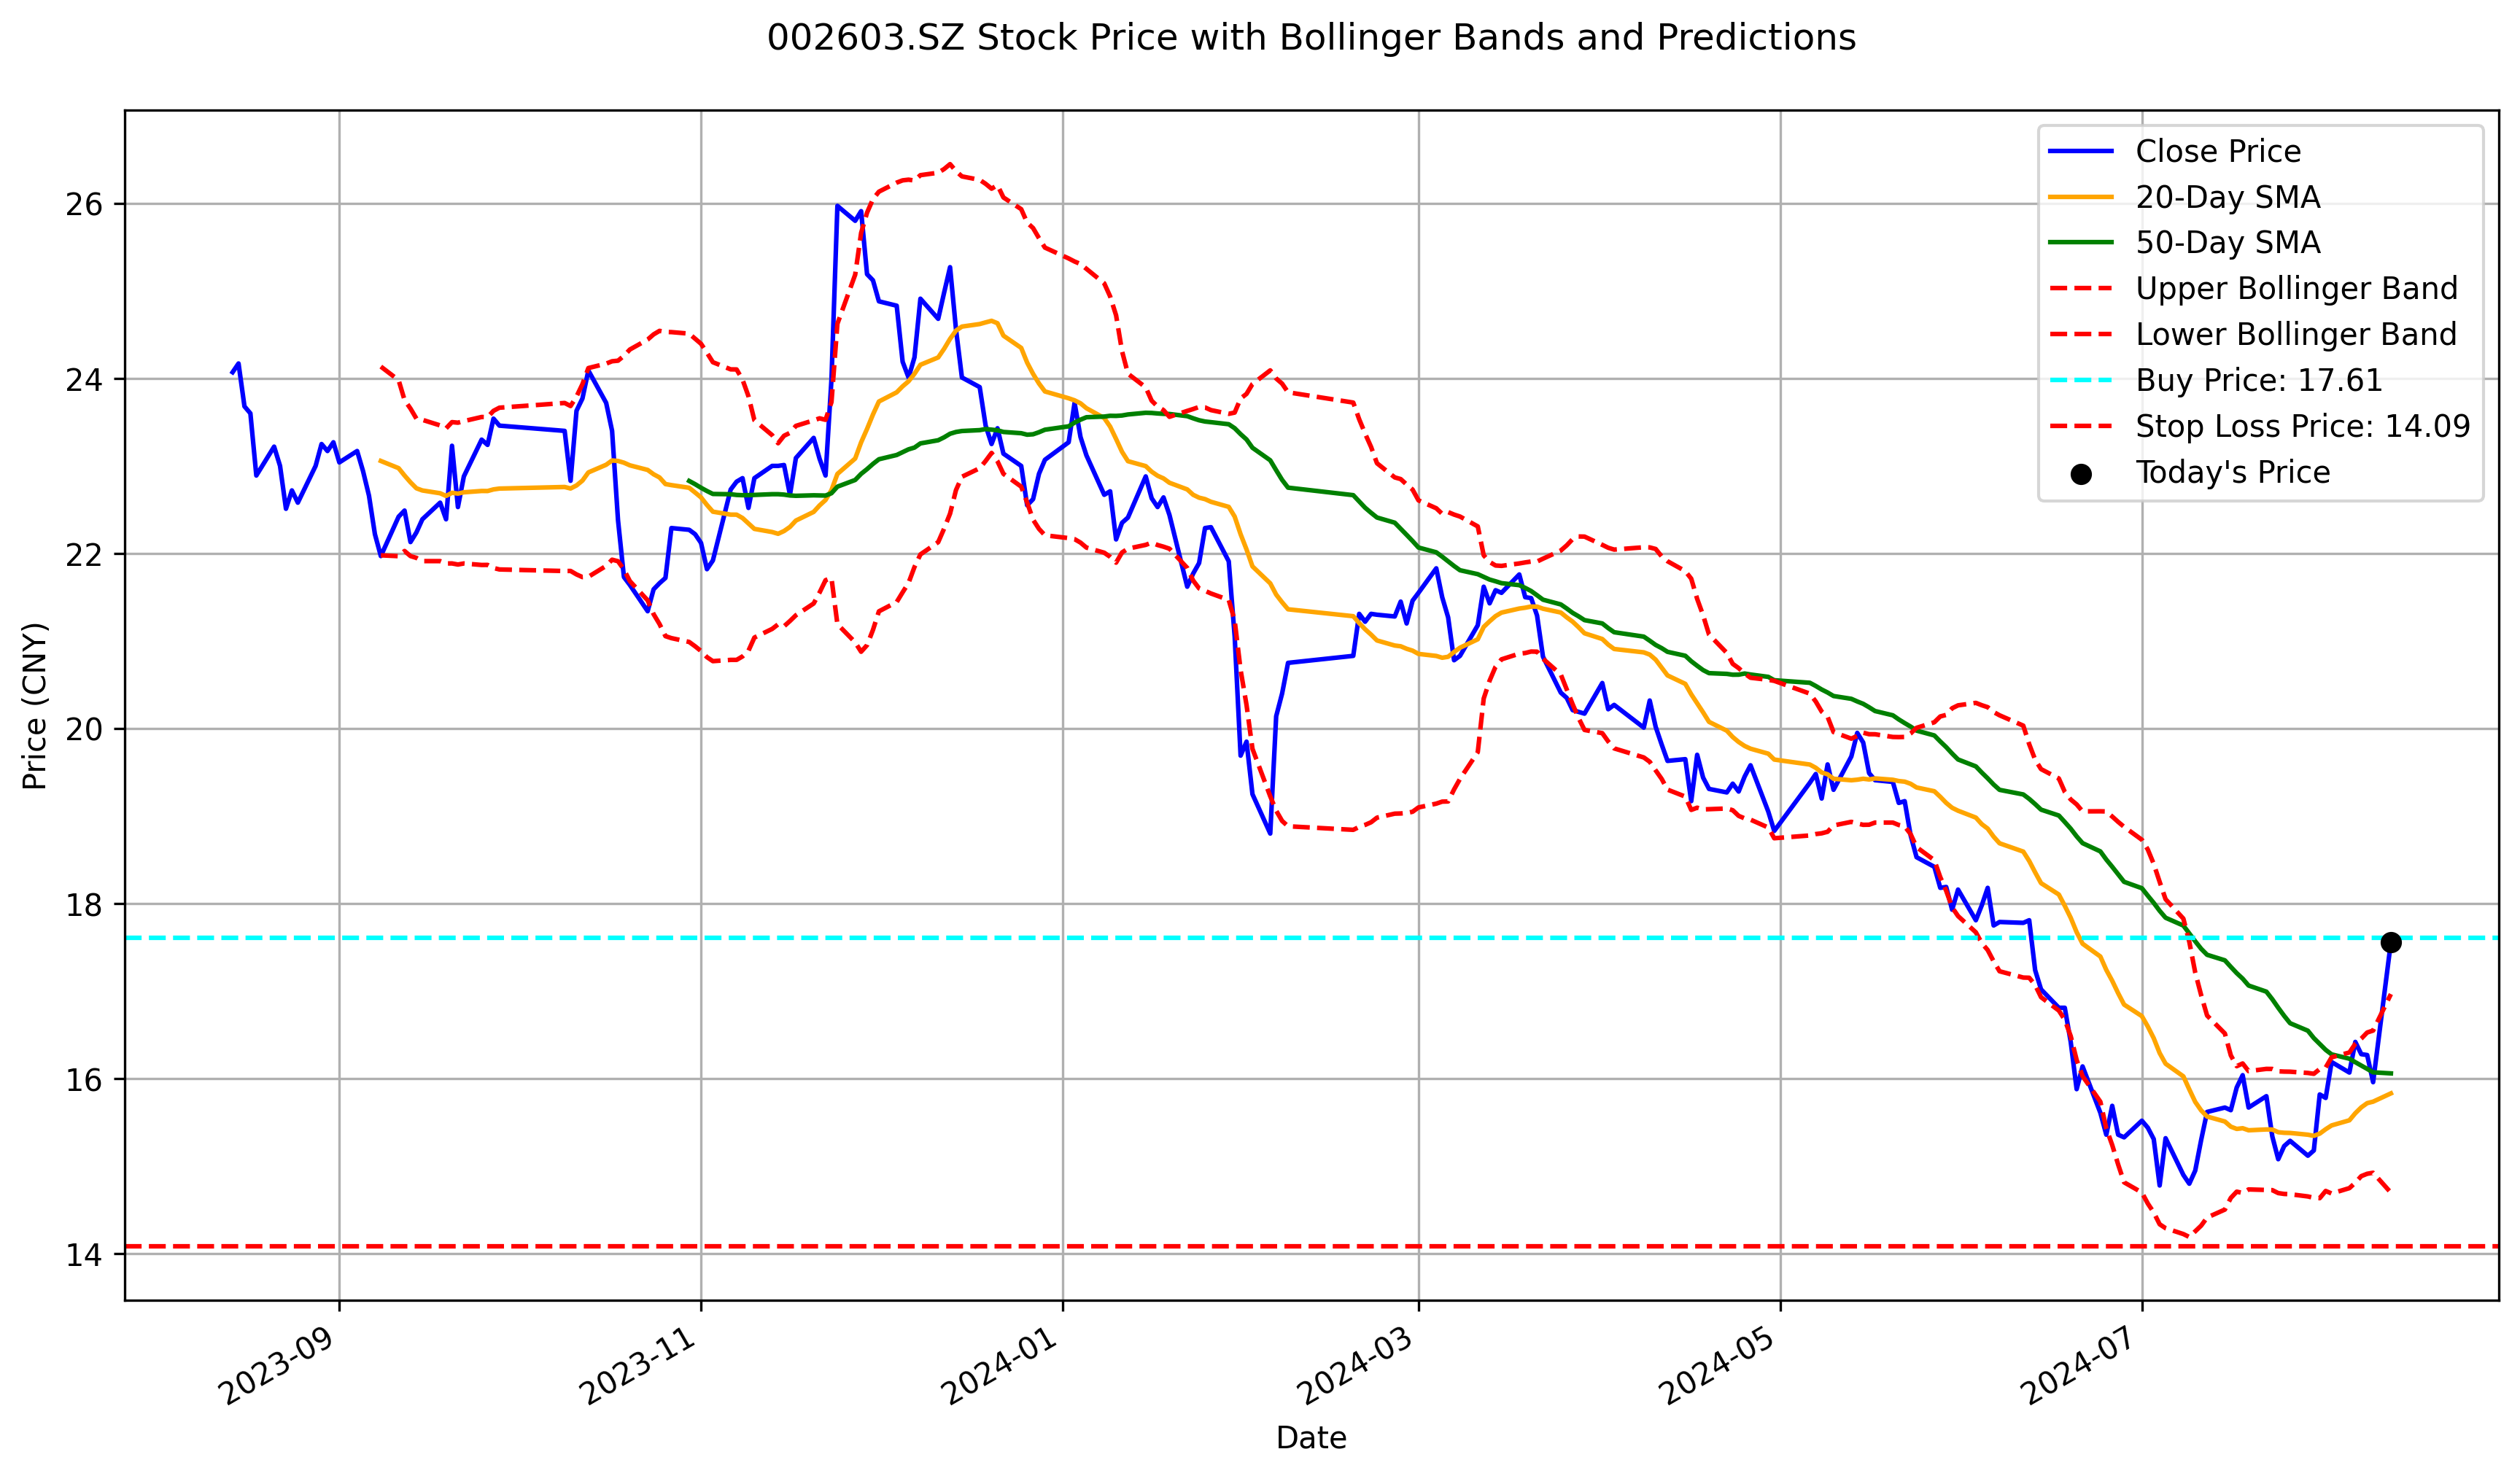

In [26]:
# Step 2: Calculate short-term (20 days) and long-term (50 days) sliding averages and Bollinger Bands
stock_data['SMA20'] = talib.SMA(stock_data['Close'], timeperiod=20)
stock_data['SMA50'] = talib.SMA(stock_data['Close'], timeperiod=50)
stock_data['UpperBand'], stock_data['MiddleBand'], stock_data['LowerBand'] = talib.BBANDS(stock_data['Close'],
                                                                                          timeperiod=20)

# Step 3: Predict the trend data for the next 3 months
X = np.array(range(len(stock_data))).reshape(-1, 1)
y = stock_data['Close'].values

# Linear Regression for trend prediction
model = LinearRegression()
model.fit(X, y)
future_days = 90  # Predict for 3 months (approx. 90 days)
future_X = np.array(range(len(stock_data) + future_days)).reshape(-1, 1)
predicted_y = model.predict(future_X)

# Step 4: Plotting the data with Bollinger Bands and teacup handle prediction
plt.figure(figsize=(14, 8), dpi=300)

# Plot historical data
plt.plot(stock_data['Date'], stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Date'], stock_data['SMA20'], label='20-Day SMA', color='orange')
plt.plot(stock_data['Date'], stock_data['SMA50'], label='50-Day SMA', color='green')
# plot Bollinger Bands
plt.plot(stock_data['Date'], stock_data['UpperBand'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(stock_data['Date'], stock_data['LowerBand'], label='Lower Bollinger Band', color='red', linestyle='--')
# plt.fill_between(stock_data['Date'], stock_data['UpperBand'], stock_data['LowerBand'], 
#                  color='lightblue', alpha=0.05, label='Bollinger Band') # alpha 越小，颜色越浅

# Plot predicted data
future_dates = pd.date_range(stock_data.index[-1], periods=future_days + 1, inclusive='right')
# plt.plot(future_dates, predicted_y[-future_days:], label='Predicted Close Price', color='purple', linestyle='--')

# Step 5: Add reference lines
buy_price = 17.61
stop_loss_price = buy_price * 0.8  # Stop loss at 20% below buying price

plt.axhline(y=buy_price, color='cyan', linestyle='--', label=f'Buy Price: {buy_price:.2f}')
plt.axhline(y=stop_loss_price, color='red', linestyle='--', label=f'Stop Loss Price: {stop_loss_price:.2f}')

# Step 6: Mark today's price with a circle
plt.scatter(stock_data['Date'].iloc[-1], stock_data['Close'].iloc[-1], color='black', label="Today's Price", zorder=5)

# Formatting the plot
plt.title(f'{ticker} Stock Price with Bollinger Bands and Predictions', pad=20)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(rotation=45)
# 自动调整日期标签
plt.gcf().autofmt_xdate()

# Show the plot
plt.show()

In [2]:
df

NameError: name 'df' is not defined

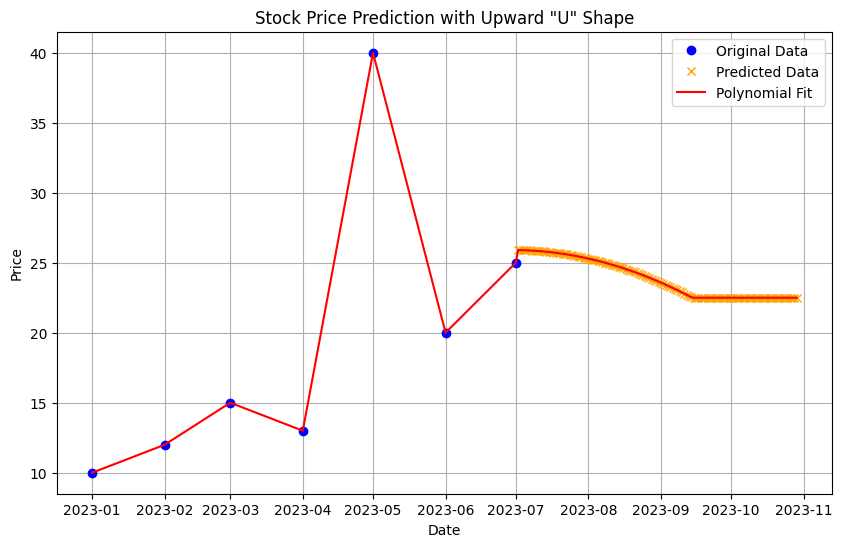

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# Example stock price data with datetime
dates = np.array([
    datetime(2023, 1, 1), datetime(2023, 2, 1), datetime(2023, 3, 1),
    datetime(2023, 4, 1), datetime(2023, 5, 1), datetime(2023, 6, 1),
    datetime(2023, 7, 1)
])
prices = np.array([10, 12, 15, 13, 40, 20, 25])

# Convert datetime to numerical format (days since start)
date_nums = (dates - dates[0]).astype('timedelta64[D]').astype(int).reshape(-1, 1)

# Polynomial regression setup
degree = 2  # Quadratic to ensure upward "U"
poly = PolynomialFeatures(degree)
date_nums_poly = poly.fit_transform(date_nums)

# Fit the model with a constraint to ensure it curves upwards
model = LinearRegression()
model.fit(date_nums_poly, prices)

# Generate future dates for prediction
future_days = 120  # Predict for the next 4 months
future_dates = np.array([dates[-1] + timedelta(days=i) for i in range(1, future_days+1)])
future_date_nums = (future_dates - dates[0]).astype('timedelta64[D]').astype(int).reshape(-1, 1)
future_date_nums_poly = poly.transform(future_date_nums)

# Predict future prices
predicted_prices = model.predict(future_date_nums_poly)

# Modify the trend to enforce the "U" shape
predicted_prices = np.maximum(predicted_prices, prices[-1] * 0.9)

# Combine historical and predicted data for plotting
all_dates = np.concatenate([dates, future_dates])
all_prices = np.concatenate([prices, predicted_prices])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(dates, prices, 'o', label='Original Data', color='blue')
plt.plot(future_dates, predicted_prices, 'x', label='Predicted Data', color='orange')
plt.plot(all_dates, all_prices, label='Polynomial Fit', color='red')
plt.title('Stock Price Prediction with Upward "U" Shape')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [45]:
import yfinance as yf

# Define the stock ticker for Yiling Pharmaceutical
ticker = '002603.SZ'

# Download historical data for the specific date
data = yf.download(ticker, start='2024-08-13', end='2024-08-14')

# Extract the closing price on 2024/8/13
closing_price = data['Close'].iloc[0]
print(f"The closing price on 2024-08-13 was: {closing_price}")


[*********************100%%**********************]  1 of 1 completed

The closing price on 2024-08-13 was: 18.1299991607666
